In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import numpy as np
from PIL import Image
import sys
sys.path.append('..')

from src.dataset.datasets import TensorDatasetWithTransformations, get_test_dataset, get_train_dataset

## Load data

In [2]:
train_images = np.load(os.path.join('../data', 'train_images.npy'))
train_masks = np.load(os.path.join('../data', 'train_masks.npy'))
test_images = np.load(os.path.join('../data', 'test_images.npy'))
test_masks = np.load(os.path.join('../data', 'test_masks.npy'))

In [3]:
train_images_with_flip = np.load(os.path.join('../data', 'train_images_with_flip.npy'))
train_masks_with_flip = np.load(os.path.join('../data', 'train_masks_with_flip.npy'))
test_images_with_flip = np.load(os.path.join('../data', 'test_images_with_flip.npy'))
test_masks_with_flip = np.load(os.path.join('../data', 'test_masks_with_flip.npy'))

In [4]:
train_images_with_flip_and_rots = np.load(os.path.join('../data', 'train_images_with_flip_and_rots.npy'))
train_masks_with_flip_and_rots = np.load(os.path.join('../data', 'train_masks_with_flip_and_rots.npy'))
test_images_with_flip_and_rots = np.load(os.path.join('../data', 'test_images_with_flip_and_rots.npy'))
test_masks_with_flip_and_rots = np.load(os.path.join('../data', 'test_masks_with_flip_and_rots.npy'))

In [ ]:
images = train_images[:1]

## Horizontal flip

In [ ]:
fliped_images = np.flip(images, axis=2)

In [ ]:
type(images[0])

In [ ]:
Image.fromarray(images[0])

In [ ]:
Image.fromarray(fliped_images[0])

### Rotation

In [ ]:
fliped_images = np.rot90(images, k=1, axes=(1,2))

In [ ]:
Image.fromarray(fliped_images[0])

## Creating data

In [ ]:
def roll_axis(file):
    arr = np.load(file)
    arr = np.einsum('bchw->bhwc', arr)
    np.save(file, arr)

In [ ]:
def normalize_masks(file):
    arr = np.load(file)
    arr = arr.astype('float32')
    arr = arr / 255.0
    np.save(file, arr)

In [ ]:
def rename_npy(from_file, to_file):
    arr = np.load(from_file)
    np.save(to_file, arr)

In [ ]:
# rename_npy('../data/gsn_img_uint8.npy', '../data/train_images.npy')
# rename_npy('../data/gsn_msk_uint8.npy', '../data/train_masks.npy')
# rename_npy('../data/test_gsn_image.npy', '../data/test_images.npy')
# rename_npy('../data/test_gsn_mask.npy', '../data/test_masks.npy')

In [ ]:
# normalize_masks('../data/train_masks.npy')

In [ ]:
train_images_with_flip.shape

In [ ]:
def f(images, masks, file, prefix):
    result_images = []
    result_masks = []
    for image, mask in zip(images, masks):
        # identity
        result_images.append(image)
        result_masks.append(mask)

#         #flip
#         result_images.append(np.flip(image, axis=1))
#         result_masks.append(np.flip(mask, axis=1))

        #rotate 90
        result_images.append(np.rot90(image, k=1, axes=(0,1)))
        result_masks.append(np.rot90(mask, k=1, axes=(0,1)))

        #rotate 270
        result_images.append(np.rot90(image, k=3, axes=(0,1)))
        result_masks.append(np.rot90(mask, k=3, axes=(0,1)))

    np.save(f'../data/{prefix}_images{file}.npy', np.stack(result_images))
    np.save(f'../data/{prefix}_masks{file}.npy', np.stack(result_masks))

In [ ]:
# f(test_images_with_flip, test_masks_with_flip, '_with_flip_and_rots', 'test')

## Plot grid

In [112]:
def plot_grid(images, masks, ncol=10, nrow=5):
    imgs = [Image.fromarray(img) for img in images[:100]]
    msks = [Image.fromarray(msk[:, :, 0] * 255) for msk in masks[:100]]
    
    x,y = imgs[0].size
    cvs = Image.new('RGB',(x*ncol,2*y*nrow))
    for i in range(len(imgs)):
        px, py = x*(i%ncol), y*int(i/ncol)
        cvs.paste(imgs[i],(px,2*py))
        cvs.paste(msks[i],(px,128+2*py))
    return cvs

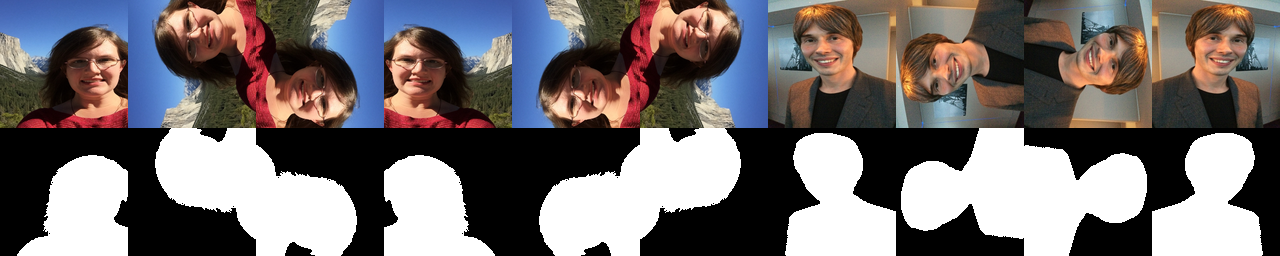

In [113]:
plot_grid(train_images_with_flip_and_rots, train_masks_with_flip_and_rots, ncol=10, nrow=1)

## nie wiem

In [ ]:
import torch
img = train_images_with_flip_and_rots[1]
img = np.einsum('hwc->chw', img)
img = torch.from_numpy(img)
img = torch.rot90(img, k=3, dims=(1, 2))
img = img.numpy()
img = np.einsum('chw->hwc', img)
Image.fromarray(img)

## Test dataset class

In [5]:
import torch
from torch.utils.data import TensorDataset
import torchvision.transforms.functional as tvtf
IMAGE_MEAN = [0.5194, 0.4623, 0.432]
IMAGE_STD = [0.2642, 0.25, 0.2445]

In [6]:
class TensorDatasetWithTransformations(TensorDataset):
    def __init__(self, *tensors, transforms=[]):
        super().__init__(*tensors)
        self.transforms = transforms

    def __getitem__(self, index):
        image, mask = super().__getitem__(index)
        image = tvtf.to_pil_image(image)
#         image = tvtf.adjust_brightness(image, 0.6 + torch.rand(1) / 1.3)
#         image = tvtf.adjust_contrast(image, 0.75 + torch.rand(1) / 2.0)
#         image = tvtf.adjust_hue(image, (torch.rand(1) -0.5) / 25.0)
#         image = tvtf.adjust_saturation(image, 0.75 + torch.rand(1) / 2.0)
#         image = tvtf.to_tensor(image)
#         image = tvtf.normalize(image, IMAGE_MEAN, IMAGE_STD)
        return image, mask
    
train_images = np.load(os.path.join('../data', 'train_images_with_flip.npy'))
train_masks = np.load(os.path.join('../data', 'train_masks_with_flip.npy'))

train_images_tensor = torch.from_numpy(train_images)
train_masks_tensor = torch.from_numpy(train_masks)

train_images_tensor = torch.einsum('bhwc->bchw', train_images_tensor)
train_masks_tensor = torch.einsum('bhwc->bchw', train_masks_tensor)

train_dataset = TensorDatasetWithTransformations(train_images_tensor, train_masks_tensor, transforms=[])

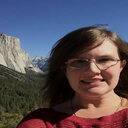

In [252]:
image = tvtf.adjust_brightness(img, 0.78 + torch.rand(1) / 2.5)
image = tvtf.adjust_saturation(image, 0.85 + torch.rand(1) / 5.0)
image

In [ ]:
image = tvtf.adjust_contrast(img, 0.75 + torch.rand(1) / 2.0)
image

In [ ]:
image = tvtf.adjust_saturation(img, 0.75 + torch.rand(1) / 2.0)
image

In [ ]:
image = tvtf.adjust_brightness(img, 0.6 + torch.rand(1) / 1.4)
image

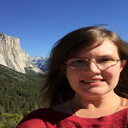

In [7]:
img, msk = train_dataset[0]
img

In [ ]:
img

In [ ]:
plot_grid(test_images, test_masks, ncol=10, nrow=4)

In [ ]:
def form_dataset_to_pil(img):
    import torch
    img = np.einsum('chw->hwc', img.numpy())
    img = img * 255
    return img.astype('uint8')

In [ ]:
Image.fromarray(form_dataset_to_pil(img))

In [ ]:
def preprocess_masks(folderpath, input_filepath, out_filepath):
    input_filepath = os.path.join(folderpath, input_filepath)
    out_filepath = os.path.join(folderpath, out_filepath)

    array = np.load(input_filepath)
    array = np.rollaxis(array, 3, 1)
    array = array.astype('float32')
    array[array>0.0] = 1.0
    np.save(out_filepath, array)

In [ ]:
def preprocess_images(folderpath, input_filepath, out_filepath):
    input_filepath = os.path.join(folderpath, input_filepath)
    out_filepath = os.path.join(folderpath, out_filepath)

    array = np.load(input_filepath)
    array = np.einsum('bhwc->bchw', array)
    array = array.astype('float32')
    np.save(out_filepath, array)